<a href="https://colab.research.google.com/github/Dima2865/SII_Labs/blob/main/SII_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

uploaded

In [ ]:
import os

for dirpath, _, filenames in os.walk('/content/'):
  for filename in filenames:
    print(os.path.join(dirpath, filename))

In [ ]:
!ls

In [ ]:
!ls /content/sample_data/

In [ ]:
type(uploaded['test.csv'])

In [ ]:
uploaded_str = uploaded['test.csv'].decode()
print(type(uploaded_str))

In [ ]:
print(uploaded_str[:35])

In [ ]:
uploaded_list = uploaded_str.split('\r\n')
type(uploaded_list)

In [ ]:
for i, line in enumerate(uploaded_list):
  print(line)
  if i == 3:
    break

In [10]:
# передадим функции open() адрес файла
# параметр 'r' означает, что мы хотим прочитать (read) файл
f1 = open('/content/train.csv', 'r')

In [ ]:
# метод .read() помещает весь файл в одну строку
# выведем первые 142 символа (если параметр не указывать, выведется все содержимое)
print(f1.read(142))
# в конце файл необходимо закрыть
f1.close()


In [ ]:
# снова откроем файл
f2 = open('/content/train.csv', 'r')
# пройдемся по нашему объекту в цикле for и параллельно создадим индекс
for i, line in enumerate(f2):
  # выведем строки без служебных символов по краям
  print(line.strip())
  # дойдя до четвертой строки, прервемся
  if i == 3:
    break
# не забудем закрыть файл
f2.close()


In [ ]:
# скажем Питону: "открой файл и назови его f3"
with open('/content/test.csv', 'r') as f3:
# "пройдись по строкам без служебных символов"
  for i, line in enumerate(f3):
    print(line.strip())
    # и "прервись на четвертой строке"
    if i == 3:
      break


In [ ]:
# импортируем библиотеку
import pandas as pd
# применим функцию read_csv() и посмотрим на первые три записи файла train.csv
train = pd.read_csv('/content/train.csv')
train.head(3)

In [ ]:
# сделаем то же самое с файлом test.csv
test = pd.read_csv('/content/test.csv')
test.head(3)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


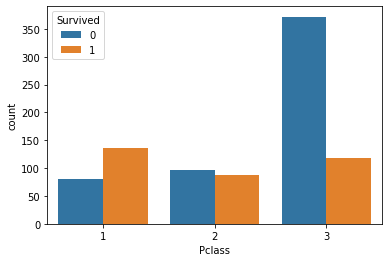

In [21]:
# для построения графиков воспользуемся новой для нас библиотекой seaborn
import seaborn as sns
# посмотрим насколько значим класс билета для выживания пассажира
# с помощью x и hue мы можем уместить две категориальные переменные на одном графике
sns.countplot(x = 'Pclass', hue = 'Survived', data = train)

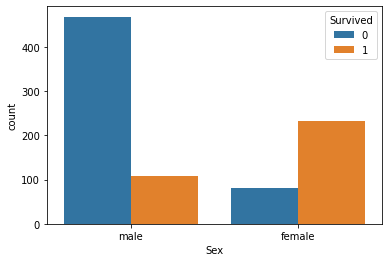

In [22]:
# кто выживал чаще, мужчины или женщины?
sns.countplot(x = 'Sex', hue = 'Survived', data = train)

In [23]:
# выявим пропущенные значения с помощью .isnull() и посчитаем их количество sum()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
# переменная Cabin (номер каюты), скорее всего, не является самой важной
# избавимся от нее с помощью метода .drop()
# (параметр axis отвечает за столбцы, inplace = True сохраняет изменения)
train.drop(columns = 'Cabin', axis = 1, inplace = True)

In [25]:
# а вот Age (возраст) точно важен, заменим пустые значения средним арифметическим
train['Age'].fillna(train['Age'].mean(), inplace = True)


In [26]:
# у нас остаются две пустые строки в Embarked, удалим их
train.dropna(inplace = True)

In [27]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
# применим one-hot encoding к переменной Sex (пол) с помощью метода .get_dummies()
pd.get_dummies(train['Sex']).head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [29]:
# удалим первый столбец, он избыточен
sex = pd.get_dummies(train['Sex'], drop_first = True)
sex.head(3)

,male
0,1
1,0
2,0


In [30]:
embarked = pd.get_dummies(train['Embarked'], drop_first = True)
pclass = pd.get_dummies(train['Pclass'], drop_first = True)

In [31]:
train = pd.concat([train, pclass, sex, embarked], axis = 1)

In [32]:
# применим функцию drop() к соответствующим столбцам
train.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)
train.head(3)

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1


In [33]:
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler
# создадим объект этого класса
scaler = StandardScaler()
# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale = ['Age', 'Fare']
# рассчитаем среднее арифметическое и СКО для масштабирования данных
scaler.fit(train[cols_to_scale])
# применим их
train[cols_to_scale] = scaler.transform(train[cols_to_scale])
# посмотрим на результат
train.head(3)

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,-0.590495,1,0,-0.500240,0,1,1,0,1
1,1,0.643971,1,0,0.788947,0,0,0,0,0
2,1,-0.281878,0,0,-0.486650,0,1,0,0,1


In [34]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 2, 3, 'male', 'Q', 'S'], dtype='object')

In [35]:
train.columns = train.columns.map(str)

In [36]:
# поместим в X_train все кроме столбца Survived
X_train = train.drop('Survived', axis = 1)
# столбец 'Survived' станет нашей целевой переменной (y_train)
y_train = train['Survived']

X_train.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,-0.590495,1,0,-0.500240,0,1,1,0,1
1,0.643971,1,0,0.788947,0,0,0,0,0
2,-0.281878,0,0,-0.486650,0,1,0,0,1


In [37]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()
# обучим нашу модель
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
# сделаем предсказание класса на обучающей выборке
y_pred_train = model.predict(X_train)

In [39]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix
# передадим ей фактические и прогнозные значения
conf_matrix = confusion_matrix(y_train, y_pred_train)
# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,478,71
1,103,237


In [40]:
conf_matrix_labels = pd.DataFrame(conf_matrix, columns = 
['Прогноз погиб', 'Прогноз выжил'], index = ['Факт погиб', 'Факт выжил'])
conf_matrix_labels

,Прогноз погиб,Прогноз выжил
Факт погиб,478,71
Факт выжил,103,237


In [41]:
# рассчитаем метрику accuracy вручную
round((478 + 237)/(478 + 237 + 71 + 103), 3)

0.804

In [42]:
# импортируем метрику accuracy из sklearn
from sklearn.metrics import accuracy_score
# так же передадим ей фактические и прогнозные значения
model_accuracy = accuracy_score(y_train, y_pred_train)
# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.804

In [43]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [44]:
# для начала дадим датасету привычное название X_test
X_test = test

In [45]:
# заполним пропуски в переменных Age и Fare средним арифметическим
X_test['Age'].fillna(test['Age'].mean(), inplace = True)
X_test['Fare'].fillna(test['Fare'].mean(), inplace = True)


In [46]:
# выполним one-hot encoding категориальных переменных
sex = pd.get_dummies(X_test['Sex'], drop_first = True)
embarked = pd.get_dummies(X_test['Embarked'], drop_first = True)
pclass = pd.get_dummies(X_test['Pclass'], drop_first = True)

In [47]:
# присоединим новые столбцы к исходному датафрейму
X_test = pd.concat([test, pclass, sex, embarked], axis = 1)
# и удалим данные, которые теперь не нужны
X_test.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Cabin', 'Ticket', 'Embarked'], axis = 1, inplace = True)
# посмотрим на результат
X_test.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0


In [49]:
# применим среднее арифметическое и СКО обучающей выборки для масштабирования тестовых данных
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0.373932,0,0,-0.488579,0,1,1,1,0
1,1.338358,1,0,-0.505273,0,1,0,0,1
2,2.495670,0,0,-0.451165,1,0,1,1,0


In [50]:
X_test.columns = X_test.columns.map(str)

In [51]:
y_pred_test = model.predict(X_test)

In [52]:
# посмотрим на первые 10 прогнозных значений
y_pred_test[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [53]:
# возьмем индекс пассажиров из столбца PassengerId тестовой выборки
ids = test['PassengerId']
# создадим датафрейм из словаря, в котором
# первая пара ключа и значения - это id пассажира, вторая - прогноз "на тесте"
result = pd.DataFrame({'PassengerId': ids, 'Survived': y_pred_test})
# посмотрим, что получилось
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [54]:
# создадим новый файл result.csv с помощью функции to_csv(), удалив при этом индекс
result.to_csv('result.csv', index = False)
# файл будет сохранен в 'Сессионном хранилище' и, если все пройдет успешно, выведем следующий текст:
print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!


In [55]:
# применим метод .download() объекта files
files.download('/content/result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>